# Timeseries Analysis of the Prawler Chlorophyll Data 2016 M2

Prior to the following visual analysis, the Prawler data had been ingested and interpolated to hourly data in time and 1dB data in depth.  The shallowest depths the prawler recorded data at was ~3dB and the deepest ~47dB


![PrawlerTimeseries](images/prawler_image_0p5m.png)
Timeseries of all prawler paramaters.  Data has been interpolated to 0.5dBar bins in depth and is plotted between 0-50dbar.  Gaps in data are from equipment malfunction, poor signals, and changes in sample strategies.

In [1]:
%matplotlib inline

In [51]:
import datetime
import pandas as pd


### Read in Data Set

the chlorophyl has been previously integrated between 5-45dBar from 1dBar gridded data

In [28]:
f='data/Intchlor.csv' #previously processed Prawler data combined with EcoFluorometer data

data = pd.read_csv(f,index_col=0,parse_dates=True)

In [29]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3534 entries, 2016-05-04 19:00:00 to 2016-09-29 00:00:00
Data columns (total 7 columns):
IntegratedChlor_5t045    2678 non-null float64
11m Prawler              2676 non-null float64
24m Prawler              2676 non-null float64
0m Eco                   3520 non-null float64
11m Eco                  3523 non-null float64
24m Eco                  3523 non-null float64
52m Eco                  3531 non-null float64
dtypes: float64(7)
memory usage: 220.9 KB


,IntegratedChlor_5t045,11m Prawler,24m Prawler,0m Eco,11m Eco,24m Eco,52m Eco
time,,,,,,,
2016-05-04 19:00:00,239.129077,8.618629,4.764247,4.22819,NaN,NaN,0.952074
2016-05-04 20:00:00,220.522243,8.047561,2.299798,2.97345,NaN,NaN,0.716257
2016-05-04 21:00:00,221.360514,8.647467,2.228116,3.32125,NaN,NaN,1.028860
2016-05-04 22:00:00,230.205592,9.729538,3.141690,2.87635,NaN,NaN,1.219900
2016-05-04 23:00:00,257.048866,10.775621,4.627692,3.91353,NaN,NaN,1.267070


### Evaluating the entire time series

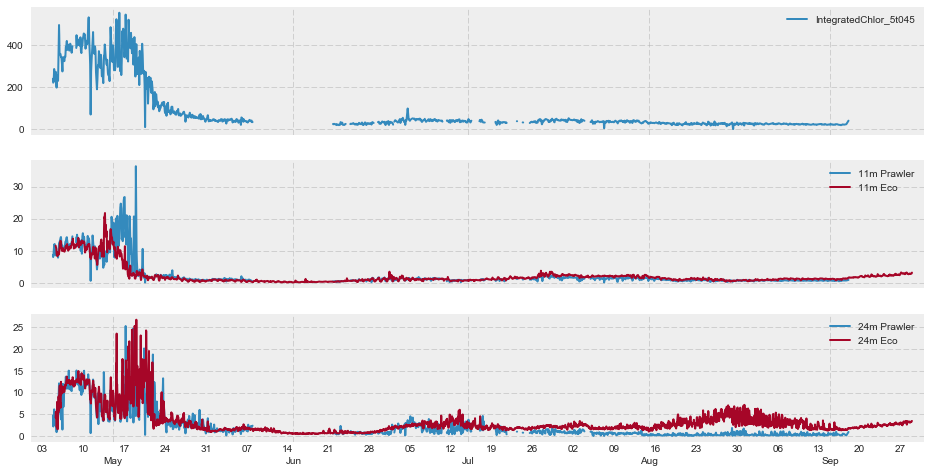

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

plt.style.use('bmh')

def axis_formater(ax):
    ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=15))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.legend()
    ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,10,1)])
    return (ax)

plt.figure(figsize=(16,8))
plt.subplot(3,1,1)
ax=plt.gca()
plt.plot(data.index,data['IntegratedChlor_5t045'])
ax = axis_formater(ax)

plt.subplot(3,1,2)
ax=plt.gca()
plt.plot(data.index,data['11m Prawler'])
plt.plot(data.index,data['11m Eco'])
ax = axis_formater(ax)

plt.subplot(3,1,3)
ax=plt.gca()
plt.plot(data.index,data['24m Prawler'])
plt.plot(data.index,data['24m Eco'])

ax = axis_formater(ax)

ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='major', pad=15)



### Zooming in to May/Early June...

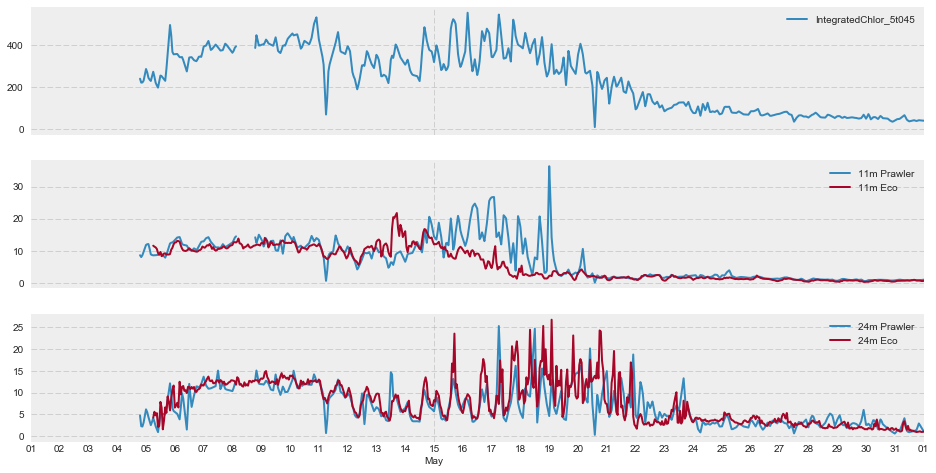

In [55]:
def axis_formater(ax):
    ax.xaxis.set_major_locator(dates.DayLocator(bymonthday=15))
    ax.xaxis.set_minor_locator(dates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.legend()
    ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
    return (ax)

plt.figure(figsize=(16,8))
ax = plt.subplot(3,1,1)
plt.plot(data.index,data['IntegratedChlor_5t045'])
ax = axis_formater(ax)
ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
plt.subplot(3,1,2)
ax=plt.gca()
plt.plot(data.index,data['11m Prawler'])
plt.plot(data.index,data['11m Eco'])
ax = axis_formater(ax)
ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
plt.subplot(3,1,3)
ax=plt.gca()
plt.plot(data.index,data['24m Prawler'])
plt.plot(data.index,data['24m Eco'])

ax = axis_formater(ax)
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='major', pad=15)



### Overlaying SFC ,11, 24 and 52m Eco's

The 11m and 24m Ecofluorometers are on the M2 Peggy Mooring whle the SFC and 52m Ecofluomters are on the ITAE Mooring.

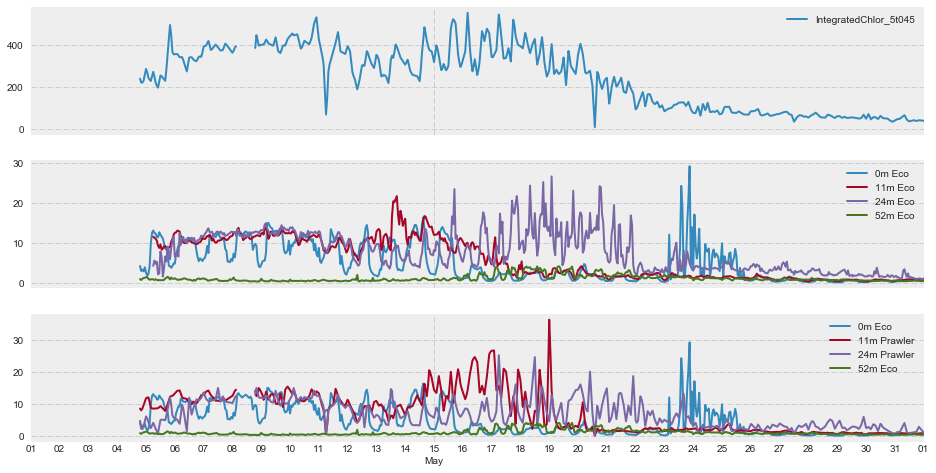

In [56]:
plt.figure(figsize=(16,8))
ax = plt.subplot(3,1,1)
plt.plot(data.index,data['IntegratedChlor_5t045'])
ax = axis_formater(ax)
ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
plt.subplot(3,1,2)
ax=plt.gca()
plt.plot(data.index,data['0m Eco'])
plt.plot(data.index,data['11m Eco'])
plt.plot(data.index,data['24m Eco'])
plt.plot(data.index,data['52m Eco'])
ax = axis_formater(ax)
ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
plt.subplot(3,1,3)
ax=plt.gca()
plt.plot(data.index,data['0m Eco'])
plt.plot(data.index,data['11m Prawler'])
plt.plot(data.index,data['24m Prawler'])
plt.plot(data.index,data['52m Eco'])

ax = axis_formater(ax)
ax.set_xlim([datetime.datetime(2016,5,1),datetime.datetime(2016,6,1)])
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_tick_params(which='major', pad=15)